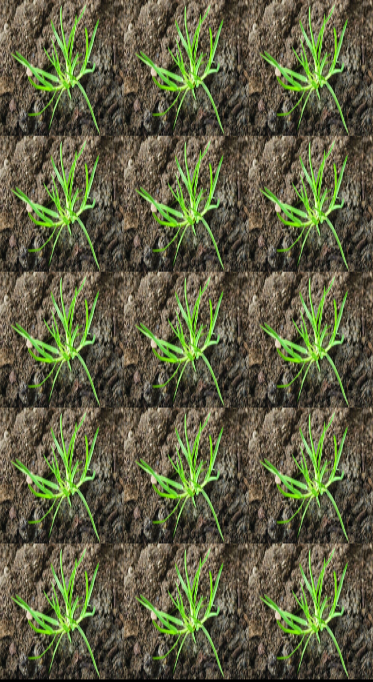

Image saved to C:\DataAugmentation-8\short_width_patch\sample_image_shifted_20_tile3x5.png


In [5]:
from PIL import Image
import cv2
import os
import numpy as np
from IPython.display import display

# Define the input paths and factors for resizing
input_path = r'C:\Users\bejja\Downloads\Annual poa_1.jpeg'
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
wt = 3
ht = 5
save_path = r"C:\DataAugmentation-8\short_width_patch"
os.makedirs(save_path, exist_ok=True)

# Open the original image and resize it
original_image = Image.open(input_path)
original_width, original_height = original_image.size
small_width = original_width // wt
small_height = original_height // ht
resized_image = original_image.resize((small_width, small_height))

# Create a new blank image with the same size as the original image
combined_image = Image.new("RGB", (original_width, original_height))

# Paste the resized image in a grid
for i in range(ht):
    for j in range(wt):
        combined_image.paste(resized_image, (small_width * j, small_height * i))

# Load the original image to apply width shift
origin = cv2.imread(image_path)
height, width, _ = origin.shape

# Convert combined_image to RGB color space and numpy array
combined_image_rgb = np.array(combined_image.convert('RGB'))

# Loop to apply width shift and overlay the grid image
shift_amount = int(0.5 * original_width)
for shift in range(1):
    padded_image = cv2.copyMakeBorder(origin, 0, 0, shift_amount, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    shifted_image = padded_image[:, :-shift_amount, :]

    # Ensure both images are in RGB color space
    shifted_image_rgb = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)

    # Resize combined_image to match shifted image size
    combined_image_resized = cv2.resize(combined_image_rgb, (width, height))

    # Create binary mask from shifted image
    gray_shifted = cv2.cvtColor(shifted_image_rgb, cv2.COLOR_RGB2GRAY)
    _, binary_mask = cv2.threshold(gray_shifted, 1, 255, cv2.THRESH_BINARY_INV)

    # Overlay combined_image onto shifted image using the binary mask
    result = shifted_image_rgb.copy()
    result[binary_mask == 255] = combined_image_resized[binary_mask == 255]

    # Convert result back to PIL Image
    final_image = Image.fromarray(result)
    combined_image_resized1 = Image.fromarray(combined_image_resized)

    # Display the images
    #display(combined_image_resized1)
    display(final_image)

    # Define the full path to save the image
    file_path = os.path.join(save_path, f'sample_image_shifted_{original_width//shift_amount *10}_tile{str(wt)+"x"+str(ht)}.png')
    count = 1
    while os.path.exists(file_path):
        file_path = os.path.join(save_path, f'sample_image_shifted_{original_width//shift_amount * 10}_tile{str(wt)+"x"+str(ht)}.png')
        count += 1

    # Save the image
    final_image.save(file_path)

    print(f"Image saved to {file_path}")

    # Update the shift amount for the next iteration
    shift_amount += width // 10


In [ ]:
from PIL import Image
import cv2
import os
import numpy as np
from IPython.display import display

# Define the input paths and factors for resizing
input_path = r"C:\Users\bejja\OneDrive\Desktop\PATCH\patch_download.jpg"
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
wt = 3
ht = 5
save_path = r"C:\Users\bejja\OneDrive\Desktop\height_patch"
os.makedirs(save_path, exist_ok=True)

# Open the original image and resize it
original_image = Image.open(input_path)
original_width, original_height = original_image.size
small_width = original_width // wt
small_height = original_height // ht
resized_image = original_image.resize((small_width, small_height))

# Create a new blank image with the same size as the original image
combined_image = Image.new("RGB", (original_width, original_height))

# Paste the resized image in a grid
for i in range(ht):
    for j in range(wt):
        combined_image.paste(resized_image, (small_width * j, small_height * i))

# Load the original image to apply height shift
origin = cv2.imread(image_path)
height, width, _ = origin.shape

# Convert combined_image to RGB color space and numpy array
combined_image_rgb = np.array(combined_image.convert('RGB'))

# Loop to apply height shift and overlay the grid image
shift_amount = height // 10
for shift in range(4):
    padded_image = cv2.copyMakeBorder(origin, shift_amount, 0, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    shifted_image = padded_image[:-shift_amount, :, :]

    # Ensure both images are in RGB color space
    shifted_image_rgb = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)

    # Resize combined_image to match shifted image size
    combined_image_resized = cv2.resize(combined_image_rgb, (width, height))

    # Create binary mask from shifted image
    gray_shifted = cv2.cvtColor(shifted_image_rgb, cv2.COLOR_RGB2GRAY)
    _, binary_mask = cv2.threshold(gray_shifted, 1, 255, cv2.THRESH_BINARY_INV)

    # Overlay combined_image onto shifted image using the binary mask
    result = shifted_image_rgb.copy()
    result[binary_mask == 255] = combined_image_resized[binary_mask == 255]

    # Convert result back to PIL Image
    final_image = Image.fromarray(result)
    combined_image_resized1 = Image.fromarray(combined_image_resized)

    # Display the images
    display(final_image)

    # Define the full path to save the image
    file_path = os.path.join(save_path, f'sample_image_shifted_{shift}.png')
    count = 1
    while os.path.exists(file_path):
        file_path = os.path.join(save_path, f'sample_image_shifted_{shift}_{count}.png')
        count += 1

    # Save the image
    final_image.save(file_path)

    print(f"Image saved to {file_path}")

    # Update the shift amount for the next iteration
    shift_amount += height // 10


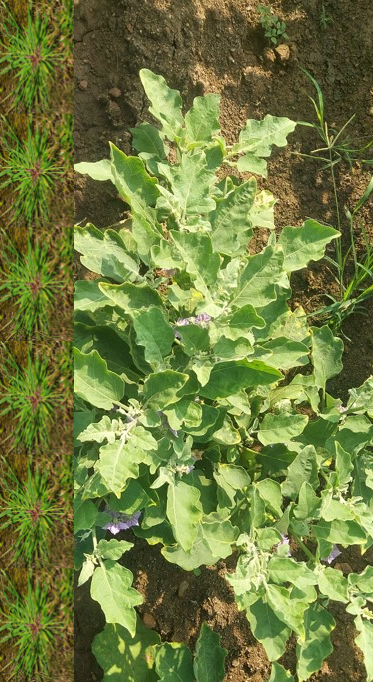

Image saved to C:\DataAugmentation-8\long_width_patch\sample_image_shifted_20_tile5x6.png


In [52]:
from PIL import Image
import cv2
import os
import numpy as np
from IPython.display import display

# Define the input paths and factors for resizing
input_path = r"C:\Users\bejja\OneDrive\Desktop\PATCH\patch_download.jpg"
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
wt = 5
ht = 6
save_path = r"C:\DataAugmentation-8\long_width_patch"
os.makedirs(save_path, exist_ok=True)

# Open the patch image and resize it to match the dimensions of the original image
patch_image = Image.open(input_path)
original_image = Image.open(image_path)
original_width, original_height = original_image.size
patch_image_resized = patch_image.resize((original_width // wt, original_height // ht))

# Create a new blank image for the grid of resized patches
patch_width_resized, patch_height_resized = patch_image_resized.size
grid_image_resized = Image.new("RGB", (patch_width_resized * wt, patch_height_resized * ht))

# Paste the resized patch image in a grid to create the grid of patches
for i in range(ht):
    for j in range(wt):
        grid_image_resized.paste(patch_image_resized, (patch_width_resized * j, patch_height_resized * i))

# Convert grid_image_resized to RGB color space and numpy array
grid_image_resized_rgb = np.array(grid_image_resized.convert('RGB'))

# Load the original image to apply width shift
origin = cv2.imread(image_path)
height, width, _ = origin.shape

# Calculate the shift amount (20% of the original width)
shift_amount = int(0.2 * original_width)

# Add padding to the left side of the image
padded_image = cv2.copyMakeBorder(origin, 0, 0, shift_amount, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))

# Crop the padded image to get the shifted image
shifted_image = padded_image[:, :-shift_amount, :]

# Ensure the shifted image is in RGB color space
shifted_image_rgb = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)

# Resize grid_image_resized to match shifted image size
grid_image_resized_resized = cv2.resize(grid_image_resized_rgb, (width, height))

# Create binary mask from shifted image
gray_shifted = cv2.cvtColor(shifted_image_rgb, cv2.COLOR_RGB2GRAY)
_, binary_mask = cv2.threshold(gray_shifted, 1, 255, cv2.THRESH_BINARY_INV)

# Overlay grid_image_resized onto shifted image using the binary mask
result = shifted_image_rgb.copy()
result[binary_mask == 255] = grid_image_resized_resized[binary_mask == 255]

# Convert result back to PIL Image
final_image = Image.fromarray(result)

# Display the final image
display(final_image)

# Define the full path to save the image
file_path = os.path.join(save_path, f'sample_image_shifted_{int((shift_amount * 100) / original_width)+1}_tile{wt}x{ht}.png')
count = 1
while os.path.exists(file_path):
    file_path = os.path.join(save_path, f'sample_image_shifted_{int((shift_amount * 100) / original_width)+1}_tile{wt}x{ht}_{count}.png')
    count += 1

# Save the image
final_image.save(file_path)

print(f"Image saved to {file_path}")


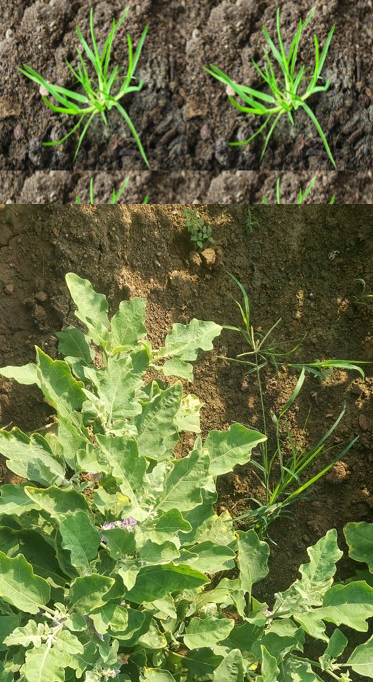

Image saved to C:\DataAugmentation-8\new_short_height_patch\sample_image_shifted_height_30_tile4x2.png


In [14]:
from PIL import Image
import cv2
import os
import numpy as np
from IPython.display import display

# Define the input paths and factors for resizing
input_path = r"C:\DataAugmentation-8\PATCH\Annual poa_1.jpeg"
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
wt = 2
ht = 4
save_path = r"C:\DataAugmentation-8\new_short_height_patch"
os.makedirs(save_path, exist_ok=True)

# Open the patch image and resize it to match the dimensions of the original image
patch_image = Image.open(input_path)
original_image = Image.open(image_path)
original_width, original_height = original_image.size
patch_image_resized = patch_image.resize((original_width // wt, original_height // ht))

# Create a new blank image for the grid of resized patches
patch_width_resized, patch_height_resized = patch_image_resized.size
grid_image_resized = Image.new("RGB", (patch_width_resized * wt, patch_height_resized * ht))

# Paste the resized patch image in a grid to create the grid of patches
for i in range(ht):
    for j in range(wt):
        grid_image_resized.paste(patch_image_resized, (patch_width_resized * j, patch_height_resized * i))

# Convert grid_image_resized to RGB color space and numpy array
grid_image_resized_rgb = np.array(grid_image_resized.convert('RGB'))

# Load the original image to apply height shift
origin = cv2.imread(image_path)
height, width, _ = origin.shape

# Calculate the shift amount (20% of the original height)
shift_amount_height = int(0.3 * original_height)

# Add padding to the top side of the image
padded_image = cv2.copyMakeBorder(origin, shift_amount_height, 0, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))

# Crop the padded image to get the shifted image
shifted_image = padded_image[:-shift_amount_height, :, :]

# Ensure the shifted image is in RGB color space
shifted_image_rgb = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB)

# Resize grid_image_resized to match shifted image size
grid_image_resized_resized = cv2.resize(grid_image_resized_rgb, (width, height))

# Create binary mask from shifted image
gray_shifted = cv2.cvtColor(shifted_image_rgb, cv2.COLOR_RGB2GRAY)
_, binary_mask = cv2.threshold(gray_shifted, 1, 255, cv2.THRESH_BINARY_INV)

# Overlay grid_image_resized onto shifted image using the binary mask
result = shifted_image_rgb.copy()
result[binary_mask == 255] = grid_image_resized_resized[binary_mask == 255]

# Convert result back to PIL Image
final_image = Image.fromarray(result)

# Display the final image
display(final_image)

# Define the full path to save the image
file_path = os.path.join(save_path, f'sample_image_shifted_height_{int((shift_amount_height * 100) / original_height)+1}_tile{ht}x{wt}.png')
count = 1
while os.path.exists(file_path):
    file_path = os.path.join(save_path, f'sample_image_shifted_height_{int((shift_amount_height * 100) / original_height)+1}_tile{ht}x{wt}_{count}.png')
    count += 1

# Save the image
final_image.save(file_path)

print(f"Image saved to {file_path}")
